In [1]:
import umap
import pandas as pd
from dissection_table.operations.sources import *
from dissection_table.database.sources_formatting import *
import collections
from dissection_table.operations.frequencies import *
from pgvector.sqlalchemy import Vector
from dissection_table.database.engine import init_db
from dissection_table.database.ask_db import *

from dissection_table.database.sources_formatting import feed_database
from dissection_table.operations.version_corpus import Corpus
from constants import *
from dissection_table.database.db_interface import DBInterface
await init_db(CONN_STRING)
import time
DBInterface.initialize_engine_and_session(CONN_STRING)
import matplotlib.pyplot as plt
from langchain_ollama import OllamaEmbeddings

Database 'dissection_table' already exists.
Ensuring database tables exist...
Database tables checked/created.
Database initialization complete.
DBInterface: SQLAlchemy engine and AsyncSessionLocal initialized.


/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
s = time.time()
await feed_database()
e = time.time()
print(e-s)

In [3]:
'popo'

'popo'

In [4]:
print((e-s)/60)

3.700098665555318


In [2]:
# from langchain_ollama import OllamaEmbeddings
# ollama_emb = OllamaEmbeddings(model="granite-embedding:278m")

In [3]:
# reducer.fit_transform(embeddings_list)

In [2]:
# await open_request("DROP TABLE version;")
# await open_request("DROP TABLE paragraph;")

In [5]:
#await feed_database()

In [6]:
#await get_all_embeddings('spanish_1')

In [5]:
original_1 = await Corpus.create("spanish_1")
original_2 = await Corpus.create("spanish_2")
english_1 =  await Corpus.create("english_1")
english_2 =  await Corpus.create("english_2")
italian_1 =  await Corpus.create("italian_1")
portuguese_1 =  await Corpus.create("portuguese_1")
french_1 = await Corpus.create("french_1")

In [6]:
or_1_em = await original_1.all_umap()
or_2_em = await original_2.all_umap()
en_1_em= await english_1.all_umap()
en_2_em= await english_2.all_umap()
it_1_em= await italian_1.all_umap()
po_1_em= await portuguese_1.all_umap()
fr_1_em = await french_1.all_umap()

In [13]:
or_1_em[100]

array([11.74689  , 11.280223 , -1.1529104], dtype=float32)

In [14]:
or_2_em[100]

array([11.746327 , 11.276797 , -1.1517967], dtype=float32)

In [27]:
en_1_em[102]

array([11.734244 , 11.291897 , -1.1492745], dtype=float32)

In [16]:
en_2_em[100]

array([11.751256 , 11.310653 , -1.1537973], dtype=float32)

In [17]:
it_1_em[100]

array([11.779374 , 11.275679 , -1.1486988], dtype=float32)

In [28]:
await english_1.n_paragraph(101)

'a week ago'

In [29]:
await original_1.n_paragraph(99)

'hace ya siete días'

In [30]:
await open_request("select count(*) from paragraph", fetch_as_dict=True)

[{'count': 10081}]

In [103]:
len(embeddings)

10081

In [170]:
embeddings[0]

'or_1_em_0'

In [12]:
or_1_em

"This version: spanish_1 doesn't exist or has no UMAP embeddings."

In [105]:
all_embs = np.concat(  (or_1_em,
                        or_2_em,
                        en_1_em,
                        en_2_em,
                        it_1_em,
                        po_1_em,
                        fr_1_em), axis=0)

In [106]:
len(all_embs)

10081

In [138]:
s = time.time()
both_umap = perform_umap_reduction(all_embs)
e = time.time()
print(e-s)

/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


5.481372356414795


In [139]:
dict_umap_embedding = dict(zip(embeddings,both_umap))

In [140]:
embeddings.index('it_1_em_1200')

7002

In [144]:
both_umap[7002]

[5.164046764373779, 4.301203727722168, 5.82706880569458]

In [142]:
dict_umap_embedding['it_1_em_1200'][:3]

[5.164046764373779, 4.301203727722168, 5.82706880569458]

In [146]:
grouped_data_with_indices = collections.defaultdict(list)

for key, data_vector in dict_umap_embedding.items():
    # Split the key to get the group name and the index
    parts = key.rsplit('_', 1) # Split only on the last underscore
    if len(parts) == 2:
        group_name = parts[0]
        try:
            index = int(parts[1])
            grouped_data_with_indices[group_name].append((index, data_vector))
        except ValueError:
            print(f"Warning: Could not parse index from key '{key}'. Skipping.")
    else:
        print(f"Warning: Key format unexpected for '{key}'. Skipping.")

# Dictionary to store the final NumPy matrices for each group
final_matrices = {}

# Process each group
for group_name, items in grouped_data_with_indices.items():
    # Sort the items by index in descending order
    # item[0] is the index, item[1] is the data_vector
    sorted_items = sorted(items, key=lambda x: x[0], reverse=True)

    # Extract only the data vectors in their sorted order
    sorted_data_vectors = [item[1] for item in sorted_items]

    # Convert the list of data vectors into a NumPy matrix
    if sorted_data_vectors: # Ensure the list is not empty before converting
        final_matrices[group_name] = np.array(sorted_data_vectors)
    else:
        print(f"Warning: No data vectors found for group '{group_name}'.")

In [147]:
final_matrices.keys()

dict_keys(['or_1_em', 'or_2_em', 'en_1_em', 'en_2_em', 'it_1_em', 'po_1_em', 'fr_1_em'])

In [148]:
final_matrices['or_1_em'][0]

array([ 9.54003048, -0.14437792,  9.05637169])

/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


5.384754180908203


In [108]:
both_umap[0]

[7.576539039611816, 1.3670144081115723, 5.165207862854004]

In [109]:
embeddings[0]

'or_1_em_0'

In [116]:
embeddings.index('fr_1_em_0')

8693

In [112]:
both_umap[1444]

[7.580067157745361, 1.3611048460006714, 5.170863151550293]

In [114]:
both_umap[4355]

[7.473933219909668, 1.319040060043335, 5.255375862121582]

In [117]:
both_umap[8693]

[7.5173163414001465, 1.3592970371246338, 5.213531494140625]

In [4]:
q =await original.n_paragraph_embedding(15)
q[:4]

[-0.028065505, 0.06424787, -0.0040225377, 0.028359836]

In [5]:
w = await original_1.n_paragraph_embedding(15)
w[:4]

[-0.028065505, 0.06424787, -0.0040225377, 0.028359836]

In [ ]:
w = await original_1.n_paragraph_embedding(15)
w[:4]

In [13]:
await original_1.n_paragraph_umap(15)

[5.3948426, 4.192959, 5.8427324]

In [22]:
len(or_1_em)

1444

In [25]:
or_1_em[1443][:2]

array([0.01727753, 0.01655463], dtype=float32)

In [26]:
len(or_em)

1447

In [28]:
or_em[1446][:3]

array([ 0.01727753,  0.01655463, -0.04119665], dtype=float32)

In [32]:
both = np.concat((or_em, or_1_em), axis=0)

In [33]:
len(both)

2891

In [37]:
both[1446+1444][:3]

array([ 0.01727753,  0.01655463, -0.04119665], dtype=float32)

In [38]:
s = time.time()
both_umap = perform_umap_reduction(both)
e = time.time()
print(e-s)

/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


7.5037548542022705


In [39]:
both_umap[0]

[-0.5118455290794373, 2.1395840644836426, 2.81969952583313]

In [43]:
both_umap[1447]

[-0.5167580246925354, 2.1607468128204346, 2.8225812911987305]

In [44]:
both_umap[1446]

[0.961727499961853, -0.05912557989358902, 2.315767526626587]

In [45]:
both_umap[-1]

[0.9557501673698425, -0.06006516143679619, 2.3125734329223633]

In [60]:
one_emb = np.array(both_umap[:1447])

In [61]:
two_emb = np.array(both_umap[1447:])

In [62]:
two_emb[0]

array([-0.51675802,  2.16074681,  2.82258129])

In [63]:
one_emb[0]

array([-0.51184553,  2.13958406,  2.81969953])

In [14]:

#or_em[15][:4]
from dissection_table.operations.umap_reduction import perform_umap_reduction
or_em_umap = perform_umap_reduction(or_em)
or_em_1_umap = perform_umap_reduction(or_1_em)

/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
or_em[15][:4]

array([-0.0280655 ,  0.06424787, -0.00402254,  0.02835984], dtype=float32)

In [21]:
or_1_em[15][:4]

array([-0.0280655 ,  0.06424787, -0.00402254,  0.02835984], dtype=float32)

In [19]:
await original.n_paragraph_umap(15)

[1.708701, 5.92617, 9.068351]

In [15]:
or_em_umap[15]

[1.7087010145187378, 5.9261698722839355, 9.068350791931152]

In [16]:
or_em_1_umap[15]

[5.394842624664307, 4.192958831787109, 5.8427324295043945]

In [18]:
await original_1.n_paragraph_umap(15)

[5.3948426, 4.192959, 5.8427324]

In [10]:
q[15]

[5.394842624664307, 4.192958831787109, 5.8427324295043945]

In [14]:
original.n_words

33369

In [17]:
p = await original.all_paragraphs()

In [18]:
len(p)

1447

In [19]:
original_1.n_words

33375

In [6]:
a = await english_1.all_umap()
b = await original.all_umap()
c = await italian_1.all_umap()
d = await portuguese_1.all_umap()
e = await english_2.all_umap()
f =  await original_1.all_umap()
g = await french_1.all_umap()

a_emb = await english_1.all_embeddings()
b_emb = await original.all_embeddings()
c_emb = await italian_1.all_embeddings()
d_emb = await portuguese_1.all_embeddings()
d_emb = await english_2.all_embeddings()
f_emb = await original_1.all_embeddings()
g_emb = await french_1.all_embeddings()


In [10]:
import seaborn as sns

In [11]:
def plot_3d_umap_embeddings(embeddings_list: list[np.ndarray], labels_list: list[str],
                            colors_list: list[str] = None, alphas_list: list[float] = None,
                            title: str = "3D UMAP Embeddings Comparison"):
    """
    Generates a 3D scatter plot for multiple sets of UMAP embeddings,
    allowing custom colors and alpha values for each distribution.

    Args:
        embeddings_list (list[np.ndarray]): A list of NumPy arrays, where each array
                                            contains 3D UMAP embeddings.
                                            Expected shape for each array: (n_samples, 3).
        labels_list (list[str]): A list of labels, corresponding to each set of embeddings
                                 in embeddings_list.
        colors_list (list[str], optional): A list of color strings (e.g., 'red', '#FF0000').
                                           If provided, must have the same length as embeddings_list.
                                           Defaults to a seaborn palette.
        alphas_list (list[float], optional): A list of alpha (transparency) values (0.0 to 1.0).
                                             If provided, must have the same length as embeddings_list.
                                             Defaults to 0.2 for all.
        title (str): The title of the plot.

    Raises:
        ValueError: If any input embeddings array is not 3-dimensional,
                    or if the number of embeddings sets does not match the number of labels,
                    colors, or alphas.
    """
    num_distributions = len(embeddings_list)

    if num_distributions != len(labels_list):
        raise ValueError("The number of embedding arrays must match the number of labels.")
    if colors_list is not None and num_distributions != len(colors_list):
        raise ValueError("If 'colors_list' is provided, its length must match the number of embedding arrays.")
    if alphas_list is not None and num_distributions != len(alphas_list):
        raise ValueError("If 'alphas_list' is provided, its length must match the number of embedding arrays.")

    # Create a new figure and a 3D subplot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get a default color palette if custom colors are not provided
    default_colors = sns.color_palette("rocket", n_colors=num_distributions)

    # Iterate through each set of embeddings and its corresponding label
    for i, (embeddings, label) in enumerate(zip(embeddings_list, labels_list)):
        # Basic validation: Ensure embeddings are 3-dimensional
        if embeddings.shape[1] != 3:
            raise ValueError(f"Embeddings set '{label}' must have 3 columns for 3D plotting, but has {embeddings.shape[1]}.")

        # Determine the color and alpha for the current distribution
        current_color = colors_list[i] if colors_list is not None else default_colors[i]
        current_alpha = alphas_list[i] if alphas_list is not None else 0.2 # Default alpha

        # Plot the current set of embeddings
        ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2],
                   label=label, s=20, alpha=current_alpha, color=current_color)

    # Set labels for the axes
    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    ax.set_zlabel('UMAP Component 3')

    # Set the title and add a legend
    ax.set_title(title)
    ax.legend()

    # Optional: Adjust view angle for better visualization
    ax.view_init(elev=20, azim=-60) # You can play with these values

    # Show the plot
    plt.show()


AttributeError: 'str' object has no attribute 'shape'

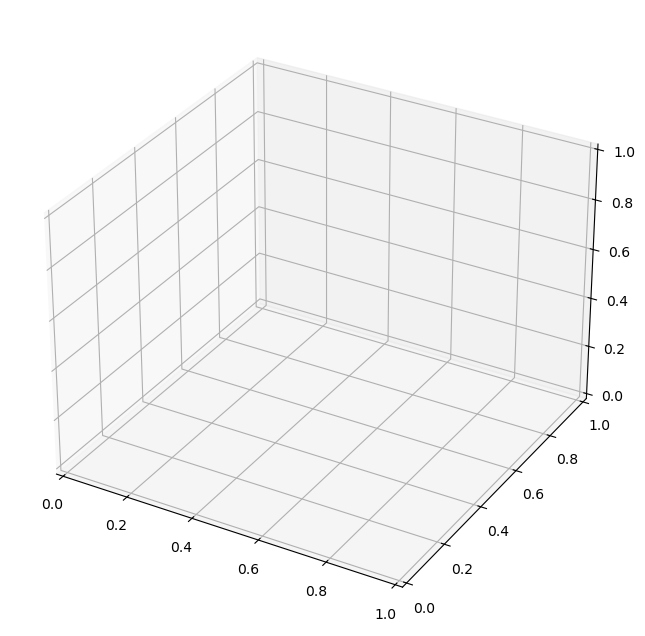

In [12]:
plot_3d_umap_embeddings(
    embeddings_list=[
        or_1_em,
        en_1_em,
        
        
    ],
    labels_list=[
        "original",
        "english_1"
    ],
    colors_list=[
        'red',      # Custom color for Italian
        'blue',     # Custom color for English
        
    ],
    alphas_list=[
        0.2,         # Custom alpha for Italian
        0.2,         # Custom alpha for English
        
    ],
    title="3D UMAP Embeddings Comparison"
)

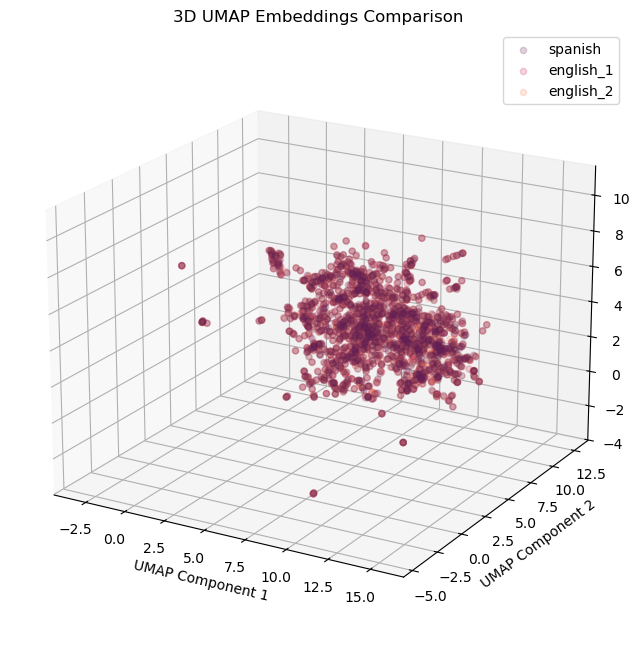

/tmp/ipykernel_1818/1744491694.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


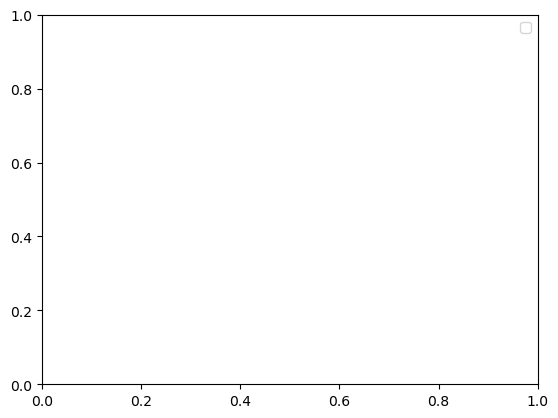

In [156]:
import matplotlib.pyplot as plt
plot_3d_umap_embeddings([final_matrices['or_2_em'],
                        final_matrices['en_1_em'],
                        final_matrices['en_2_em'],],
                        ["spanish","english_1","english_2"
                        ], 
                        title= "3D UMAP Embeddings Comparison")
plt.legend()

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # For potential color palettes or general styling, though not strictly required for basic 3D scatter

def plot_3d_umap_embeddings(embeddings1: np.ndarray, label1: str, 
                            embeddings2: np.ndarray, label2: str, 
                            title: str = "3D UMAP Embeddings Comparison"):
    """
    Generates a 3D scatter plot comparing two sets of UMAP embeddings.

    Args:
        embeddings1 (np.ndarray): The first NumPy array of 3D UMAP embeddings.
                                  Expected shape: (n_samples, 3).
        label1 (str): A label for the first set of embeddings (e.g., "English Corpus").
        embeddings2 (np.ndarray): The second NumPy array of 3D UMAP embeddings.
                                  Expected shape: (n_samples, 3).
        label2 (str): A label for the second set of embeddings (e.g., "Original Corpus").
        title (str): The title of the plot.

    Raises:
        ValueError: If the input embeddings arrays are not 3-dimensional.
    """
    # Basic validation: Ensure embeddings are 3-dimensional
    if embeddings1.shape[1] != 3 or embeddings2.shape[1] != 3:
        raise ValueError("Both embeddings arrays must have 3 columns for 3D plotting.")

    # Create a new figure and a 3D subplot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the first set of embeddings
    # s=20 sets the marker size, alpha=0.7 sets transparency
    ax.scatter(embeddings1[:, 0], embeddings1[:, 1], embeddings1[:, 2], 
               label=label1, s=20, alpha=0.7, color=sns.color_palette("deep")[0])

    # Plot the second set of embeddings
    ax.scatter(embeddings2[:, 0], embeddings2[:, 1], embeddings2[:, 2], 
               label=label2, s=20, alpha=0.7, color=sns.color_palette("deep")[1])

    # Set labels for the axes
    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    ax.set_zlabel('UMAP Component 3')

    # Set the title and add a legend
    ax.set_title(title)
    ax.legend()

    # Optional: Adjust view angle for better visualization
    ax.view_init(elev=20, azim=-60) # You can play with these values

    # Show the plot
    plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [7]:
w = await original.word_freq()

In [8]:
len(w)

5207

In [ ]:
await original.word_freq()

In [ ]:
get_word_freq_dict

In [ ]:
w

In [11]:
emb = await original.all_embeddings()

In [12]:
para = await original.all_paragraphs()

In [13]:
umap_emb = await original.all_umap()

In [18]:
words = [x for x in original.word_set.split('#') if len(x)>0 ]

In [19]:
words[:5]

['reumas', 'pesos', 'borrara', 'gato', 'vapores']

In [15]:
umap_emb[0]

array([ 7.8938613, 10.807804 ,  6.217153 ], dtype=float32)

In [10]:
am[0]

'Vine a Comala porque me dijeron que acá vivía mi padre, un tal Pedro Páramo. Mi madre me lo dijo. Y yo le prometí que vendría a verlo en cuanto ella muriera. Le apreté sus manos en señal de que lo haría; pues ella estaba por morirse y yo en plan de prometerlo todo. «No dejes de ir a visitarlo —me recomendó—. Se llama de otro modo y de este otro. Estoy segura de que le dará gusto conocerte». Entonces no pude hacer otra cosa sino decirle que así lo haría, y de tanto decírselo se lo seguí diciendo aun después que a mis manos les costó trabajo zafarse de sus manos muertas.'